In [3]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score,KFold, RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from knn_imp import KNNTO

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

%load_ext autoreload
%autoreload 2

AttributeError: partially initialized module 'pandas' has no attribute '_pandas_parser_CAPI' (most likely due to a circular import)

In [81]:
iris = datasets.load_iris()
classes_names = iris.target_names
X = pd.DataFrame(iris.data, columns=iris["feature_names"])
y = pd.DataFrame(iris.target, columns=["class"])
# y = pd.Series(iris.target)
df = pd.concat([X,y], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


### Explore data

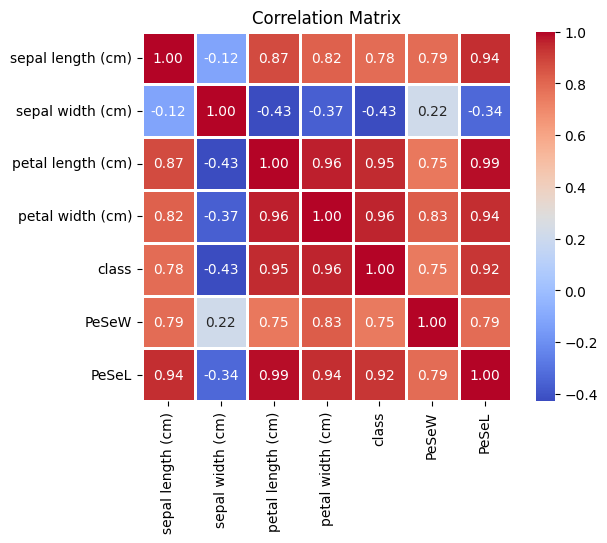

In [103]:
# corr = pd.concat([X_train,y_train], axis=1).corr()
dfc = df.copy()
dfc["PeSeW"] = dfc["petal width (cm)"] + dfc["sepal width (cm)"]
dfc["PeSeL"] = dfc["petal length (cm)"] + dfc["sepal length (cm)"]
corr = dfc.corr()
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=1)
ax.set_title("Correlation Matrix")
plt.show()

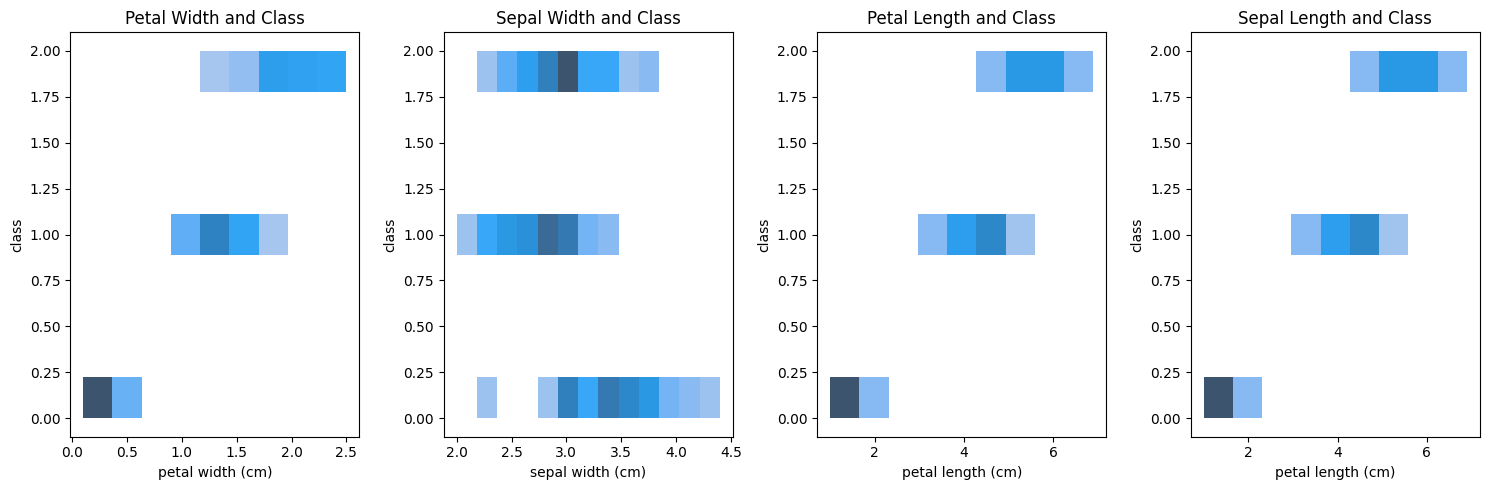

In [121]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

# Plotting on each subplot
i=0
sns.histplot(x="petal width (cm)", y="class", ax=axes[i], data=df)
axes[i].set_title("Petal Width and Class")

i=1
sns.histplot(x="sepal width (cm)", y="class", ax=axes[i], data=df)
axes[i].set_title("Sepal Width and Class")

i=2
sns.histplot(x="petal length (cm)", y="class", ax=axes[i], data=df)
axes[i].set_title("Petal Length and Class")

i=3
sns.histplot(x="petal length (cm)", y="class", ax=axes[i], data=df)
axes[i].set_title("Sepal Length and Class")

plt.tight_layout()
plt.show()

### Train model

In [118]:
logistic = make_pipeline(
    PolynomialFeatures(degree=2),  # Add polynomial features
    LogisticRegression()           # Logistic regression classifier
)
X,y = dfc.drop(columns=["class"]), dfc["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
logistic.fit(X_train, y_train)
regression_score = logistic.score(X_test, y_test)

y_pred = logistic.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



C:\Users\Ron Tohar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
knn = KNeighborsClassifier(11)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [125]:
tree = DecisionTreeClassifier()
# X,y = dfc.drop(columns=["class"]), dfc["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
tree.fit(X_train, y_train)


y_pred = logistic.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [148]:
# kf = KFold(n_splits=10)
kf = RepeatedKFold(n_splits=10, n_repeats=5)
pipeline1 = make_pipeline(
    PolynomialFeatures(degree=2),  # Add polynomial features
    LogisticRegression(solver="liblinear",max_iter=500)# Logistic regression classifier
)

clfs = [("logistic", LogisticRegression(max_iter=200)),
 ("tree", DecisionTreeClassifier()), 
 ("knn", KNeighborsClassifier(11)),
  ("pipeline", pipeline1)
  ]
for name, clf in clfs:
    scores = cross_val_score(clf, X, y, cv=kf)

    avg_score = np.mean(scores)
    print(name, avg_score)

logistic 0.96
tree 0.9386666666666666
knn 0.9533333333333335
pipeline 0.9773333333333335


C:\Users\Ron Tohar\AppData\Local\Temp\ipykernel_19328\1562265919.py:46: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test,
C:\Users\Ron Tohar\AppData\Local\Temp\ipykernel_19328\1562265919.py:46: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test,
C:\Users\Ron Tohar\AppData\Local\Temp\ipykernel_19328\1562265919.py:46: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test,
C:\Users\Ron Tohar\AppData\Local\Temp\ipykernel_1

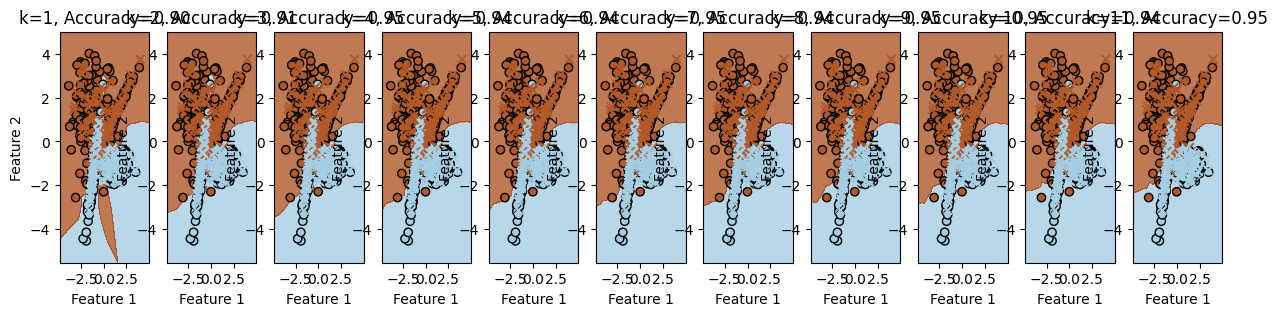

In [72]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define a range of k values to test
k_values = range(1,12)

# Create subplots for each k value
fig, axes = plt.subplots(1, len(k_values), figsize=(15, 3))

# Train and visualize the models with varying k values
for i, k in enumerate(k_values):
	# Create KNN model
	knn = KNeighborsClassifier(n_neighbors=k)

	# Train the model
	knn.fit(X_train, y_train)

	# Make predictions
	y_pred = knn.predict(X_test)

	# Calculate accuracy
	accuracy = accuracy_score(y_test, y_pred)

	# Plot decision boundary
	h = 0.02 # Step size in the mesh
	x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
	y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
	xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
						np.arange(y_min, y_max, h))
	Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
	Z = Z.reshape(xx.shape)

	# Plot the decision boundary
	axes[i].contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

	# Plot the training points
	axes[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train,
					edgecolors='k', cmap=plt.cm.Paired)

	# Plot the testing points
	axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test,
					marker='x', edgecolors='k', cmap=plt.cm.Paired)

	# Set plot labels and title
	axes[i].set_title(f'k={k}, Accuracy={accuracy:.2f}')
	axes[i].set_xlabel('Feature 1')
	axes[i].set_ylabel('Feature 2')

plt.show()
